# IS 820 Homework 1

Group Member Names: Chuheng(Kevin) Yu, Yuhan(Sherry) Wang, Linting(Linsey) Wang, Sixuan(Wilson) Wang, Tyler Christoforo

Reminder: you should not be sharing code across groups

**Warning: make sure your compute environment is set up first.** This homework assignment assumes that you have already installed Anaconda Python 3 and spaCy.

### Instructions
1. Fill in group name, and member names above
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on blackboard to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Note: Please *do not* change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will not receive points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size.**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [29]:
import glob
import numpy as np
books = glob.glob('./HW1_Dataset/*.txt')

for i in range(0,len(books)):
    with open(books[i]) as file_pi:
        data = file_pi.read()
        print(books[i],len(data))

./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
./HW1_Dataset/The King James Version of the Bible (132).txt 4351846
./HW1_Dataset/Et dukkehjem. English by Henrik Ibsen (557).txt 161241
./HW1_Dataset/Outpost in the Wilderness_ Fort Wayne, 1706-1828 by Charles Poinsatte (161).txt 363234
./HW1_Dataset/The Romance of Lust_ A Classic Victorian erotic novel by Anonymous (294).txt 1051148
./HW1_Dataset/The Odyssey by Homer (124).txt 697404
./HW1_Dataset/A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918
./HW1_Dataset/The Philosophy of Spiritual Activity by Rudolf Steiner (144).txt 545031
./HW1_Dataset/My Fifteen Lost Years by Florence Elizabeth Maybrick (499).txt 383694
./HW1_Dataset/Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).txt 1154508
./HW1_

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above; please do not repeat printing what we asked you to print in **subpart i**.

In [30]:
import glob
import numpy as np

books = glob.glob('./HW1_Dataset/*.txt')

list=[]
bookname=[]
for i in range(0,len(books)):
    with open(books[i]) as file_pi:
        data = file_pi.read()
        #print(len(data))
        #print(books[i])
        list.append(len(data))
        bookname.append(books[i])
sort_index = np.argsort(list)[::-1][:15]
#print(sort_index)
rank = range(1,16)
for i,j in zip(sort_index,rank):
    print(str(j)+'.',list[i],bookname[i])

1. 5465100 ./HW1_Dataset/The Complete Works of William Shakespeare by William Shakespeare (132).txt
2. 4351846 ./HW1_Dataset/The King James Version of the Bible (132).txt
3. 3254333 ./HW1_Dataset/Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4. 3227580 ./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt
5. 3033575 ./HW1_Dataset/Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
6. 2643849 ./HW1_Dataset/The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7. 1534140 ./HW1_Dataset/Ulysses by James Joyce (282).txt
8. 1378627 ./HW1_Dataset/My Secret Life, Volumes I. to III. by Anonymous (157).txt
9. 1238569 ./HW1_Dataset/Moby Dick; Or, The Whale by Herman Melville (413).txt
10. 1231784 ./HW1_Dataset/Leviathan by Thomas Hobbes (417).txt
11. 1214387 ./HW1_Dataset/The Republic by Plato (246).txt
12. 1200021 ./HW1_Dataset/The History of the Peloponnesian War by Thucydides (122).txt
13. 1175588 ./HW1_Dataset/The Iliad by Homer (2

**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [31]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [32]:
booksplit = []
for i in range(0,len(books)):
    with open(books[i]) as file_pi:
        data = file_pi.read()
        booksplit.append(split_into_batches(data, 10000))
num_batches = 0
for i in range(0,len(books)):
    num_batches = len(booksplit[i]) + num_batches
print("Total number of batches:",num_batches)

Total number of batches: 1246


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [33]:
import spacy
import re
import pandas as pd

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

frequency = pd.Series()
lemmas = [] #save lemmas that consist of alphabetic letters

for book in books:
    with open(book) as file_pi:
        data = file_pi.read()
        booksplit = split_into_batches(data, 10000)

    for text in booksplit:
        doc = nlp(text)
        words = [token.lemma_ for token in doc]

        for alphabetic in words:
            if re.match('[a-zA-Z]+$',alphabetic):
                lemmas.append(alphabetic)

len(lemmas)

<ipython-input-33-2026ba5f1a01>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequency = pd.Series()


12082727

In [34]:
count = pd.Series(lemmas).value_counts(sort=True)
count.to_frame().reset_index()
frequency_rank = pd.DataFrame({"rank" : range(1,len(count)+1),
                               "words" : count.to_frame().reset_index()['index'],
                               "frequency" : count.to_frame().reset_index().iloc[:,1]})
frequency_rank.iloc[0:50]

,rank,words,frequency
0,1,the,702465
1,2,be,436114
2,3,and,435424
3,4,of,386347
4,5,to,324409
5,6,I,255129
6,7,a,233423
7,8,in,204252
8,9,he,193622
9,10,that,159010


**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

In [35]:
frequency_rank.shape

(110515, 3)

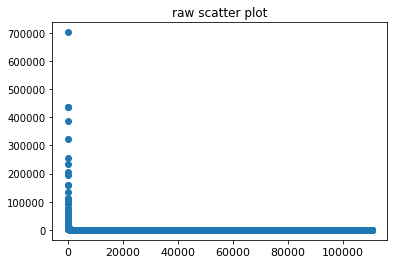

In [36]:
# Raw scatter plot
import matplotlib.pyplot as plt
plt.scatter(frequency_rank["rank"], frequency_rank["frequency"])
plt.title('raw scatter plot');

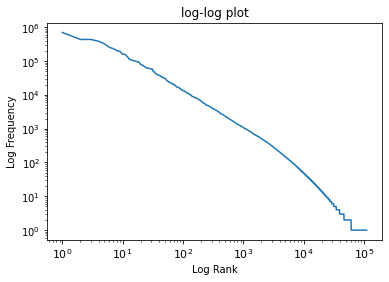

In [37]:
# Log-log plot
plt.loglog(frequency_rank["rank"], frequency_rank["frequency"])
plt.yscale('log')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('log-log plot');

**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [3 pts].** What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): 

The log-log plot above gives an inverse relationship of the log frequency and log rank, the intercept is the c and the slope is -1. The power law demonstrates a situation where the more a word is used the more it is concentrated in the top left, vice versa, the bottom right are words that are used less and ranked low. Which becomes a thin two tail graph. After a logarithmic transformation it becomes an inverse linear which is consistent with the log-log plot.


In [38]:
#print('Probability of drawing one of the 4 most frequent alphabetic lemmas: ')

freq = 0
for i in range(0,4):
    freq = frequency_rank["frequency"][i] + freq
total = sum(frequency_rank["frequency"])
print('Probability of drawing one of the 4 most frequent alphabetic lemmas: ',f"{freq / total :.2%}");

#print('Probability of drawing one of the 50 most frequent alphabetic lemmas: ')
freq = 0
for i in range(0,50):
    freq = frequency_rank["frequency"][i] + freq
total = sum(frequency_rank["frequency"])
print('Probability of drawing one of the 50 most frequent alphabetic lemmas: ',f"{freq / total :.2%}");

Probability of drawing one of the 4 most frequent alphabetic lemmas:  16.22%
Probability of drawing one of the 50 most frequent alphabetic lemmas:  48.31%


**Subpart iii [3 pts].** What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [39]:
#print("Occur only once: ")

total_row = frequency_rank.shape[0]
count_row = frequency_rank[frequency_rank["frequency"]==1].shape[0]
print("Occur only once: ",f"{count_row / total_row :.2%}")

#print("Occur fewer than 10 times: ")
total_row = frequency_rank.shape[0]
count_row = frequency_rank[frequency_rank["frequency"]<10].shape[0]
print("Occur fewer than 10 times: ",f"{count_row / total_row :.2%}")

Occur only once:  44.75%
Occur fewer than 10 times:  78.16%


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [55 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [3]:
import nltk
nltk.download('reuters') 

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/wanglinting/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [41]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

/Users/wanglinting/opt/anaconda3/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


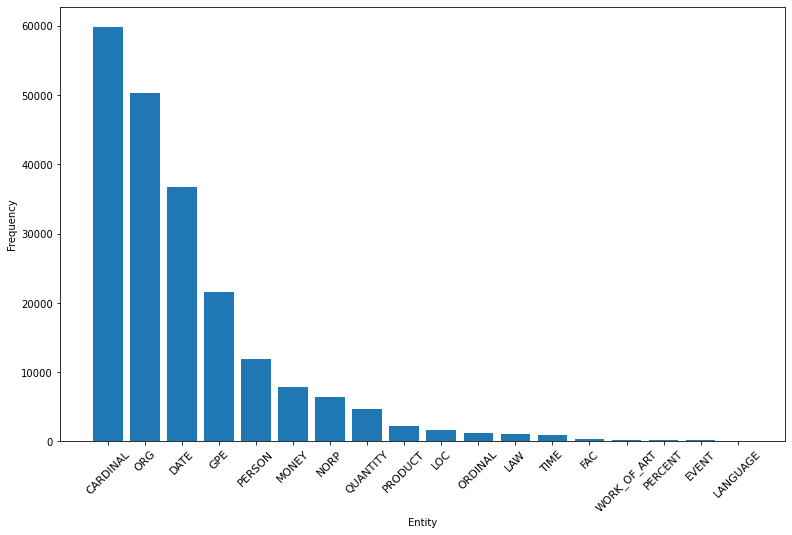

In [40]:
label_list = []
for entity in reuters_nlp:
    for i in entity.ents:
       label_list.append(str(i.label_))
       
label_counter.update(label_list)
labels = label_counter.most_common()

top_lemmas = [lemma for lemma, count in labels]
top_counts = [count for lemma, count in labels]
plt.bar(range(len(labels)), top_counts)
plt.xticks(range(len(labels)), top_lemmas, rotation=45)
plt.xlabel('Entity')
plt.ylabel('Frequency')

**(b) [20 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [42]:
def count_entities(label, reuters_nlp, number):
    store = []
    for entity in reuters_nlp:
        book = []
        for i in entity.ents:
            if i.label_ == label and i.text.lower() in book:
                continue
            elif i.label_ == label and i.text.lower() not in book:
                book.append(i.text.lower())
        store += book
            
    entities_counter = Counter(store)
    cleanlabels = entities_counter.most_common()
    return cleanlabels[:number]      

def print_table(table):
    index = 1
    for i in table:
        print(index, i[0], i[1])
        index += 1

label = 'ORG'
label1 = 'GPE'
org_10 = count_entities(label, reuters_nlp, 10)
gpe_10 = count_entities(label1, reuters_nlp, 10)
print_table(org_10)
print('-' * 100)
print_table(gpe_10)

1 cts 1115
2 reuters 444
3 the securities and exchange commission 248
4 ec 231
5 fed 230
6 treasury 228
7 cts net 179
8 the u.s. agriculture department 170
9 usda 154
10 the bank of england 143
----------------------------------------------------------------------------------------------------
1 u.s. 1631
2 japan 579
3 the united states 383
4 u.k. 297
5 canada 295
6 new york 251
7 west germany 236
8 washington 230
9 london 216
10 brazil 201


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [44]:
count = 0
for doc in reuters_nlp:   
    for ent in doc.ents:        
        if (ent.text.lower()=='opec') and (ent.label_=='ORG'):
            count += 1
            break

            
opec_prob=count/len(reuters_nlp)   
opec_prob

0.011308861698183166

In [45]:
GPE=[]
for doc in reuters_nlp:
    for ent in doc.ents:
        if ent.label_ == 'GPE' and (ent.text.lower() not in GPE):
            GPE.append(ent.text.lower())

In [46]:
GPE_probabilities = Counter()
for gpe in GPE:
    count = 0
    for doc in reuters_nlp:
        for ent in doc.ents:
            if ent.label_ == 'GPE' and ent.text.lower()==gpe:
                count += 1
                break
    GPE_probabilities[gpe] = count / len(reuters_nlp)
GPE_probabilities

Counter({'u.s.': 0.15118650352243232,
         'japan': 0.05367074527252503,
         'tokyo': 0.013811642565813867,
         'taiwan': 0.00982573229514275,
         "south korea's": 0.002410085279940675,
         'south korea': 0.0070448646644419724,
         'malaysia': 0.0055617352614015575,
         'hong kong': 0.006581386725991843,
         "hong kong's": 0.0009269558769002596,
         'canberra': 0.0001853911753800519,
         'australia': 0.010289210233592881,
         'makoto kuroda': 9.269558769002595e-05,
         'washington': 0.02131998516870597,
         'china': 0.0121431219873934,
         'thailand': 0.004263997033741194,
         'indonesia': 0.0070448646644419724,
         'rotterdam': 0.002502780867630701,
         'new south wales': 0.0011123470522803114,
         'victoria': 0.0004634779384501298,
         'sydney': 0.0012977382276603633,
         'newcastle': 0.0003707823507601038,
         'mexico': 0.004171301446051168,
         'osaka': 0.0005561735261401557

In [48]:
co_occurrence_probabilities = Counter()
for gpe in GPE:
    count = 0
    for doc in reuters_nlp:
        doc_list=[]
        for ent in doc.ents:
            doc_list.append(ent.text.lower()+ent.label_)
        if 'opecORG' in doc_list and (gpe+'GPE' in doc_list) :
            count += 1
    co_occurrence_probabilities[('opec', gpe)] = count / len(reuters_nlp)
co_occurrence_probabilities

Counter({('opec', 'u.s.'): 0.003615127919911012,
         ('opec', 'japan'): 0.0010196514645902854,
         ('opec', 'tokyo'): 0.0003707823507601038,
         ('opec', 'taiwan'): 0.0,
         ('opec', "south korea's"): 0.0,
         ('opec', 'south korea'): 0.0,
         ('opec', 'malaysia'): 0.00027808676307007786,
         ('opec', 'hong kong'): 0.0,
         ('opec', "hong kong's"): 0.0,
         ('opec', 'canberra'): 0.0,
         ('opec', 'australia'): 9.269558769002595e-05,
         ('opec', 'makoto kuroda'): 0.0,
         ('opec', 'washington'): 0.00027808676307007786,
         ('opec', 'china'): 9.269558769002595e-05,
         ('opec', 'thailand'): 0.0,
         ('opec', 'indonesia'): 0.0005561735261401557,
         ('opec', 'rotterdam'): 0.0,
         ('opec', 'new south wales'): 0.0,
         ('opec', 'victoria'): 0.0,
         ('opec', 'sydney'): 0.0,
         ('opec', 'newcastle'): 0.0,
         ('opec', 'mexico'): 0.0005561735261401557,
         ('opec', 'osaka'): 0.0,
 

In [50]:
from math import log
pmi_scores = Counter()
for gpe in GPE[:]:
    
    if GPE_probabilities[gpe] != 0 and co_occurrence_probabilities[('opec', gpe)] != 0:
        ratio = co_occurrence_probabilities[('opec', gpe)] / (opec_prob * GPE_probabilities[gpe])
        pmi_scores[gpe] = log(ratio)
pmi_scores.most_common()[:50]

[('brent', 4.482168639526364),
 ('ula fields', 4.482168639526364),
 ('emirates', 4.482168639526364),
 ('the lake charles', 4.482168639526364),
 ('bethesda', 4.482168639526364),
 ('franco', 4.482168639526364),
 ('gabon', 4.482168639526364),
 ('opec', 4.482168639526364),
 ('saudi arabia reiterates commitment to', 4.482168639526364),
 ('yanbu', 4.482168639526364),
 ('el salado', 4.482168639526364),
 ('aguarico', 4.482168639526364),
 ('ras tanurah', 4.482168639526364),
 ("ju'aymah", 4.482168639526364),
 ('jubail', 4.482168639526364),
 ('tripoli', 4.482168639526364),
 ('doha', 4.482168639526364),
 ('guayaquil', 4.482168639526364),
 ('tihamah', 4.482168639526364),
 ('redoglia', 4.482168639526364),
 ('carrington', 4.482168639526364),
 ('materialy', 4.482168639526364),
 ('vienna', 4.319649710028589),
 ('riyadh', 4.259025088212154),
 ("saudi arabia's", 4.107475190084953),
 ('balao', 4.076703531418199),
 ('quito', 4.076703531418199),
 ('qatar', 3.932122302607092),
 ('dubai', 3.9225528515909414),

In [52]:
log(len(reuters_nlp)/count('opec'))

88.42622950819673

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***

The top 50 PMI values are all the same, equating to 4.482.
The surprising thing is that taking the log of total articles divided by the frequencey of "opec" appearing equals to the top PMIs.

To put this into formulation terms, P(A,B)/P(A)xP(B), where A is the event of opec appearing, B is the event of gpe words appearing and A,B is both. This could be translated into number or counts of event, demonstrated by 

(num(A,B)/num_total)/((num(A)/num_total) x (num(B)/num_total)) **(a)**

This makes sense as this cancels out to be

(num(A,B)/num(A) x num(B)) x total **(b)**


Observing the frequency of the top 10 scenarios, these words appear once or twice in articles. However, every time this word appear in the article, opec will appear as well. Therefore, the PMI values for these will be very high. The ratio between co-occurence and the word appearing should be  num(A,B)/num(B) in formula**(b)**, as this equals to one, the PMI equals log(total/num(A)).